# Голумин Никита РТ5-61Б РК1(Вариант 5)

### Описание данных: 
Набор данных(Admission_Predict.csv) для исследования представдляет собой несколько параметров, которые считаются важными при подаче заявления на магистерские программы.

### Импорт библиотек

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks')

### Загрузка данных

In [21]:
data = pd.read_csv("Admission_Predict.csv")
#Размерность данных
data.shape

(400, 9)

In [22]:
#Первые пять строк данных
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [23]:
# типы колонок
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [24]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Пропуски в данных отсутвуют

### Удалим столбец "Serial No.", который не нагружен никакой полезной информацией для анализа данных

In [25]:
del data["Serial No."]
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Построим корреляционную матрицу

<Axes: >

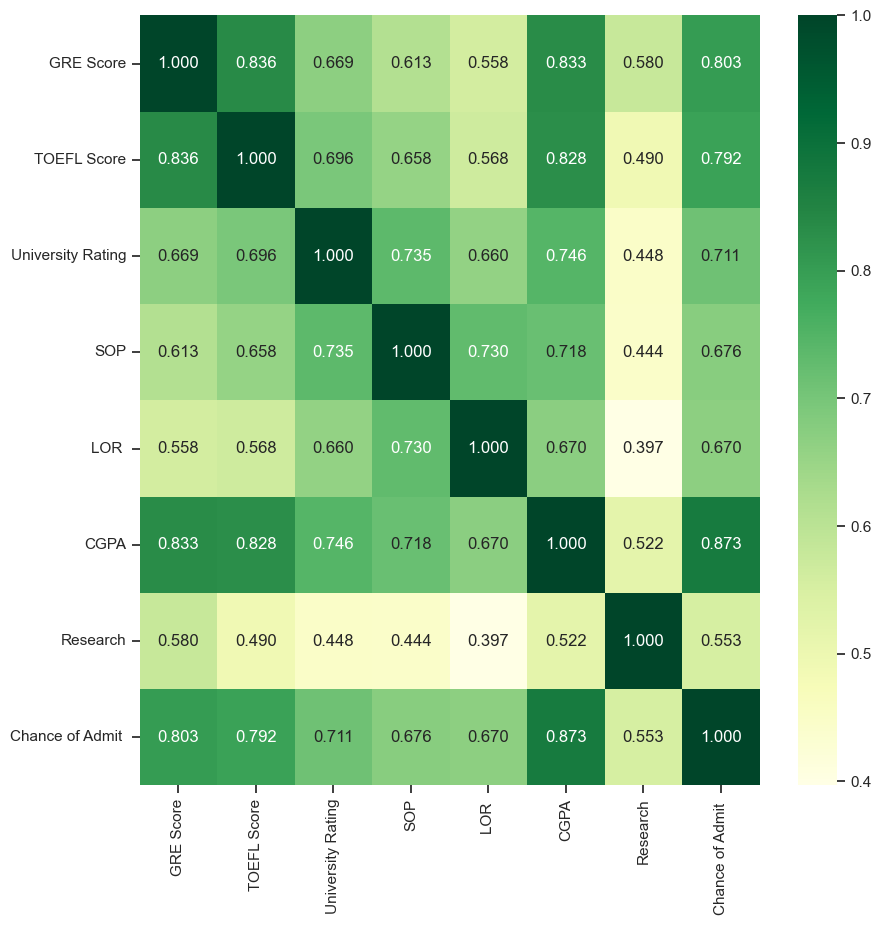

In [28]:
plt.figure(figsize=(10, 10))
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGn', annot=True, fmt='.3f')

Целевой признак(Chance of Admit) хорошо коррелирует(около 0.8) с такими признаками как:
* GRE Score(балл за экзамен GRE)
* TOEFL Score(балл за экзамен TOEFL)
* CGPA(усредненный балл оценок в аттестате)
Хуже всего с целевым признаком коррелирует признак Research(наличие опыта исследований), следовательно, им можно принебречь в первую очередь при создании модели.
GRE Score, TOEFL Score, CGPA хорошо коррелируют не только с целевым признаком, но и между собой, поэтому для улучшения модели можем оставить только 1-2 из них.

## Дополнительное задание для группы РТ5-61Б

### Построим график "Joinplot" для колонок TOEFL Score и GRE Score

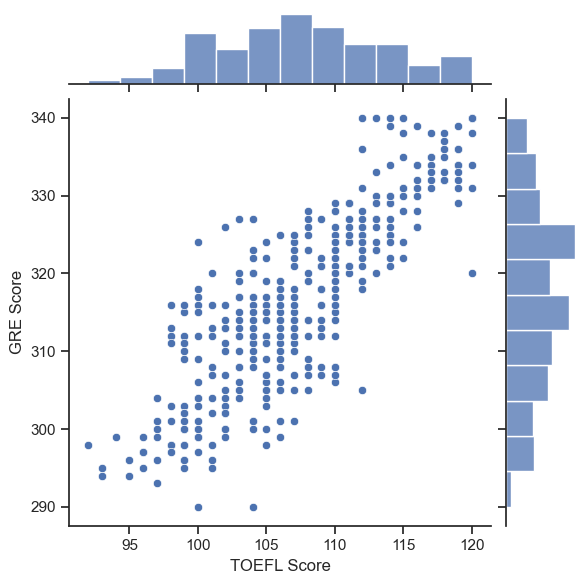

In [32]:
sns.jointplot(x='TOEFL Score', y='GRE Score', data=data)